# Description

The goal of this project is to segment credit card customers based on their financial behavior using clustering techniques. The segmentation helps identify distinct customer groups for targeted marketing strategies, product recommendations, and customer retention initiatives.

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as ax 
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

print("Done")

Done


# Loading Data

In this section, we will load the dataset into a pandas DataFrame. The dataset is stored in a CSV file located at the specified path. We will use the `pd.read_csv()` function to read the data from the CSV file and store it in a DataFrame named `data`. This will allow us to perform various data analysis and manipulation tasks on the dataset.

In [2]:
path = r'D:\Data_Projects\Credit-Card-Clustering-with-Machine-Learning\Data\CC GENERAL.csv'
data = pd.read_csv(path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Column Descriptions

1. **CUST_ID**: Unique identifier for each customer.
2. **BALANCE**: The balance amount left in their account to make purchases.
3. **BALANCE_FREQUENCY**: How frequently the balance is updated, scored between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
4. **PURCHASES**: The total amount of purchases made from the account.
5. **ONEOFF_PURCHASES**: The maximum purchase amount done in one go.
6. **INSTALLMENTS_PURCHASES**: The amount of purchase done in installment.
7. **CASH_ADVANCE**: Cash in advance given by the user.
8. **PURCHASES_FREQUENCY**: How frequently the purchases are being made, scored between 0 and 1 (1 = frequently, 0 = not frequently).
9. **ONEOFF_PURCHASES_FREQUENCY**: How frequently one-off purchases are being made, scored between 0 and 1 (1 = frequently, 0 = not frequently).
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being made, scored between 0 and 1 (1 = frequently, 0 = not frequently).
11. **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance is being paid.
12. **CASH_ADVANCE_TRX**: Number of transactions made with "Cash in Advance".
13. **PURCHASES_TRX**: Number of purchase transactions made.
14. **CREDIT_LIMIT**: The credit limit of the user.
15. **PAYMENTS**: The amount of payment made by the user.
16. **MINIMUM_PAYMENTS**: The minimum amount of payments made by the user.
17. **PRC_FULL_PAYMENT**: Percent of full payment paid by user.
18. **TENURE**: Tenure of credit card service for the user.

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,NaN,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.000,1601.225,2095.571,0.000,148.095,916.855,2105.196,19043.139
BALANCE_FREQUENCY,8636.000,0.895,0.208,0.000,0.909,1.000,1.000,1.000
PURCHASES,8636.000,1025.434,2167.108,0.000,43.367,375.405,1145.980,49039.570
ONEOFF_PURCHASES,8636.000,604.901,1684.308,0.000,0.000,44.995,599.100,40761.250
INSTALLMENTS_PURCHASES,8636.000,420.844,917.245,0.000,0.000,94.785,484.148,22500.000
CASH_ADVANCE,8636.000,994.176,2121.458,0.000,0.000,0.000,1132.385,47137.212
PURCHASES_FREQUENCY,8636.000,0.496,0.401,0.000,0.083,0.500,0.917,1.000
ONEOFF_PURCHASES_FREQUENCY,8636.000,0.206,0.300,0.000,0.000,0.083,0.333,1.000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.000,0.369,0.398,0.000,0.000,0.167,0.750,1.000
CASH_ADVANCE_FREQUENCY,8636.000,0.138,0.202,0.000,0.000,0.000,0.250,1.500


This code snippet checks if all values in the `CUST_ID` column of the data DataFrame start with the letter `C`. It uses the apply method to apply a lambda function to each element, which checks if the string starts with `C` using the startswith method. The all method is then used to verify if this condition is true for all elements in the column. The result is printed to the console.

In [5]:
all_start_with_C = data['CUST_ID'].apply(lambda x: x.startswith('C')).all()
print('Do all rows start with (C) ?',all_start_with_C)

Do all rows start with (C) ? True


Iterates through each row in the `data` DataFrame and checks if the `CUST_ID` column value starts with `C`.
If it does, the `CUST_ID` value is updated by removing the `C` and converting the remaining part to an integer.

In [6]:
for i in range(len(data)):
    if data.loc[i , 'CUST_ID'].startswith('C'):
        data.loc[i , 'CUST_ID'] = int(data.loc[i , 'CUST_ID'][1:])

In [7]:
missing_data = pd.DataFrame(data[data.columns].isnull().sum(), columns=['missing_count'])
missing_data['percentage'] = (missing_data['missing_count'] / len(data)) * 100
missing_data = missing_data[missing_data['missing_count'] > 0]

missing_data = missing_data.sort_values(by='percentage', ascending=True).reset_index().rename(columns={'index': 'column'})

missing_data

,column,missing_count,percentage
0,CREDIT_LIMIT,1,0.011
1,MINIMUM_PAYMENTS,313,3.497


### Handling Missing Values

In this section, we identified columns with missing values and calculated the percentage of missing data in each column. 

We observed that there are less than 4% missing values in the dataset. This is a relatively small amount, which can be handled by either removing the rows with missing values or imputing them with appropriate values.

Given the low percentage of missing data, we decided to drop the rows with missing values to maintain the integrity of our dataset.

In [8]:
data = data.dropna()

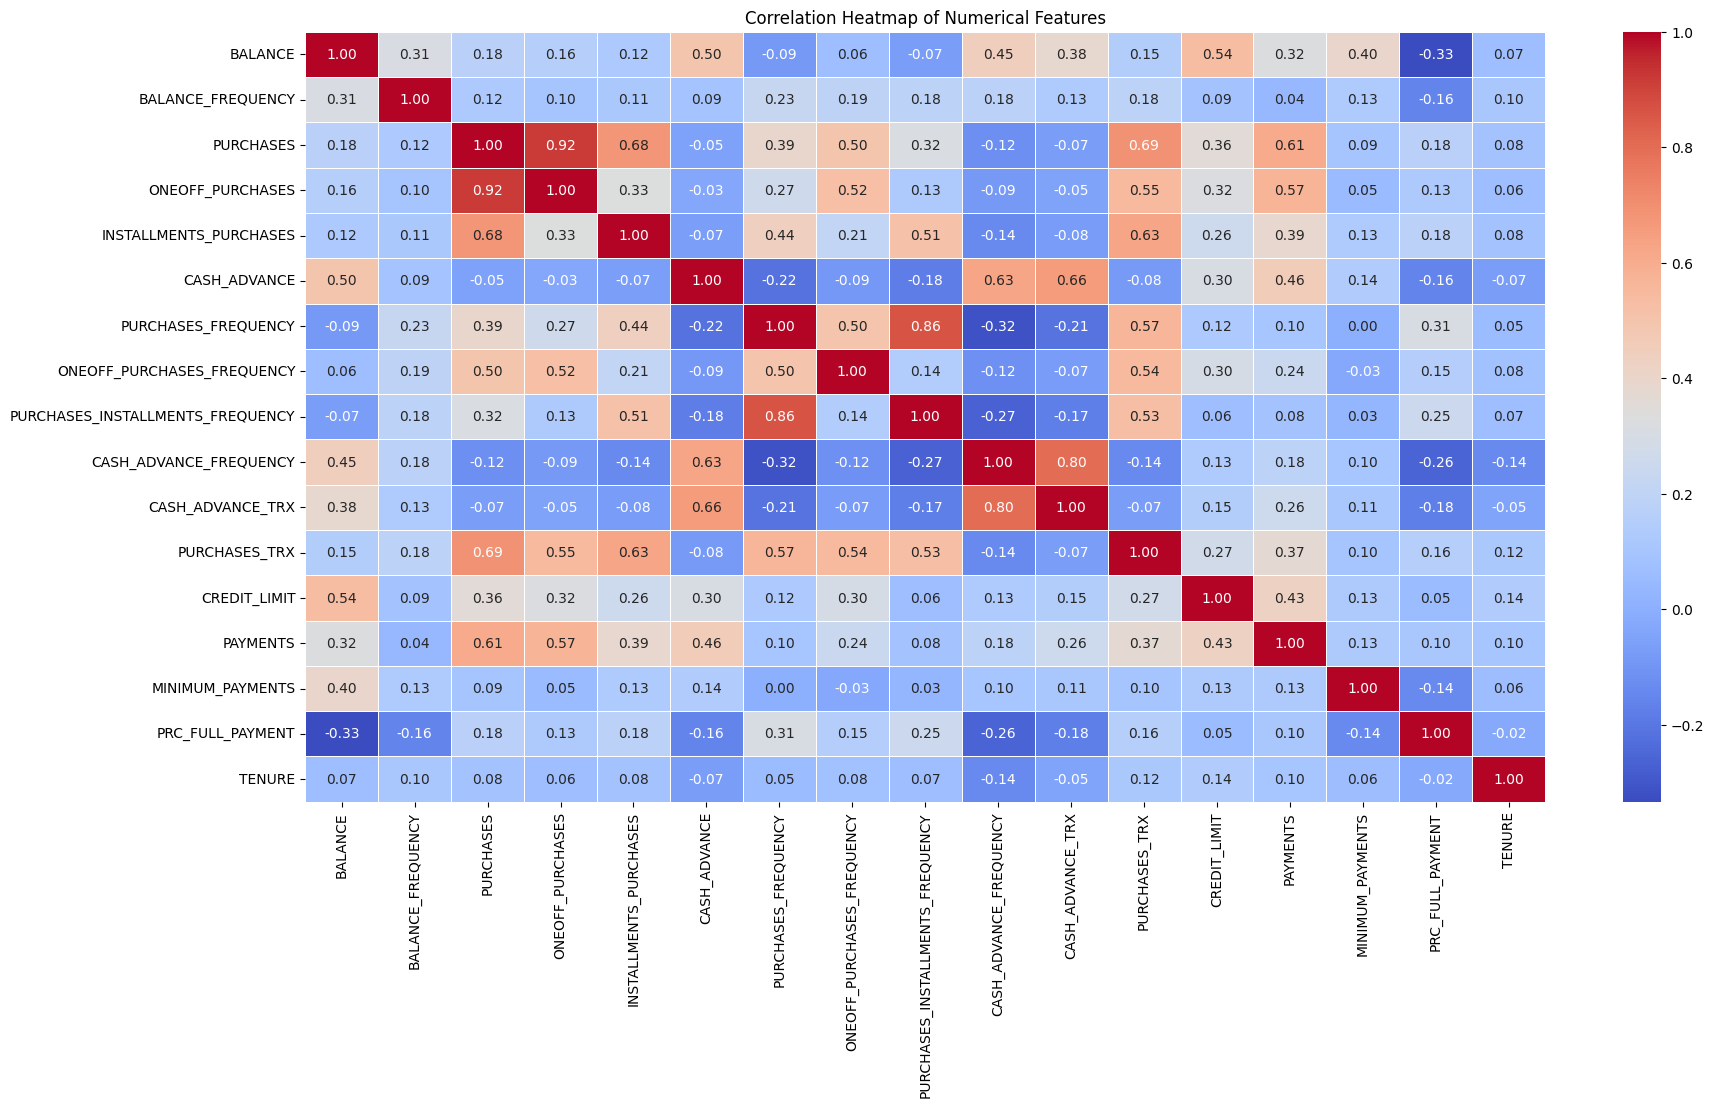

In [10]:
plt.figure(figsize=(20, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The correlation heatmap provides a comprehensive view of how numerical features relate to each other.

***Key Observations:***

**Strong Positive Correlations:**

* `BALANCE` and `CREDIT_LIMIT` (0.54): Customers with higher credit limits tend to maintain higher balances.

* `PURCHASES` and `PURCHASES_TRX` (0.69): A higher number of transactions is associated with higher purchase values.

**Negative Correlations:**

* `BALANCE_FREQUENCY` and `PRC_FULL_PAYMENT` (-0.16): Customers who pay their balances in full tend to have less frequent balances.

**Actionable Insight:**

Features with strong correlations may be redundant for predictive modeling. Consider dimensionality reduction or feature selection.

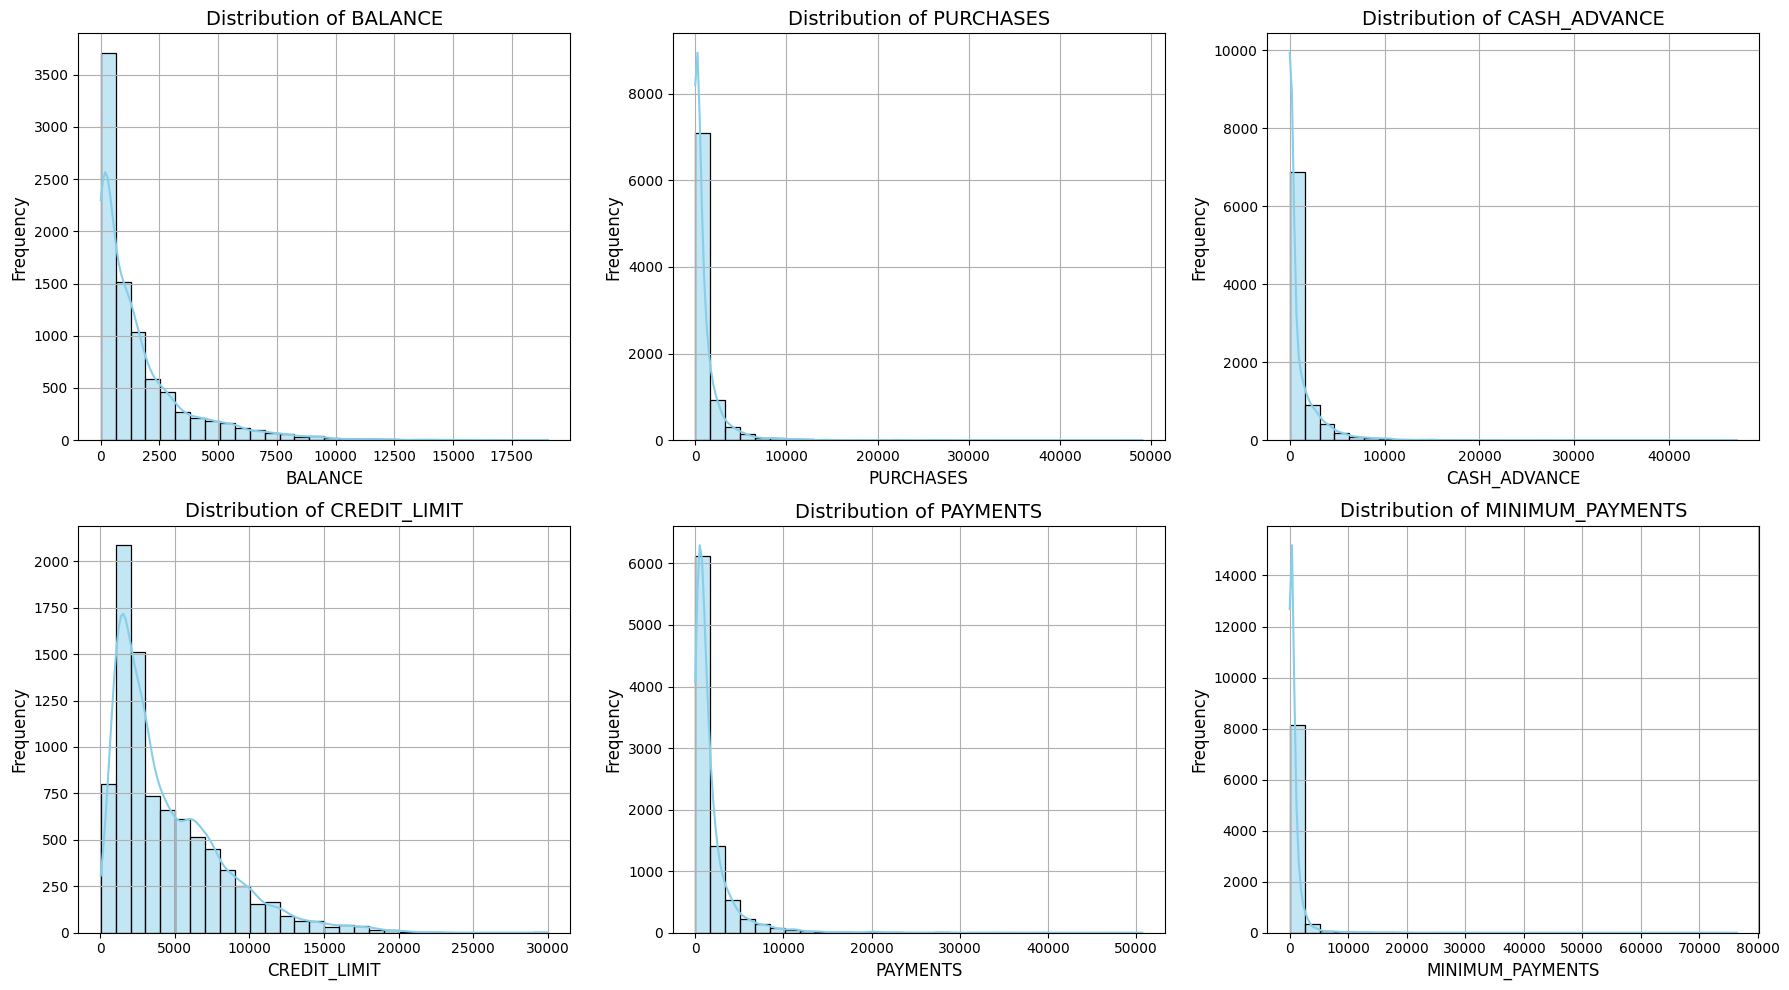

In [12]:
numerical_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

cols_per_row = 3

num_rows = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Description:**

Histograms of key features (`BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, `MINIMUM_PAYMENTS`) reveal their distribution.

***Key Observations:***

**Right-Skewed Distributions:**

Most features exhibit a long-tailed distribution, indicating outliers or high-value customers.

**Feature Highlights:**

* `BALANCE`: Concentrated under 5000, with a few outliers exceeding 10,000.

* `CASH_ADVANCE`: Majority below 5000, with significant outliers up to 40,000.

**Actionable Insight:**

Log transformation or other scaling methods may help normalize these distributions for machine learning models.

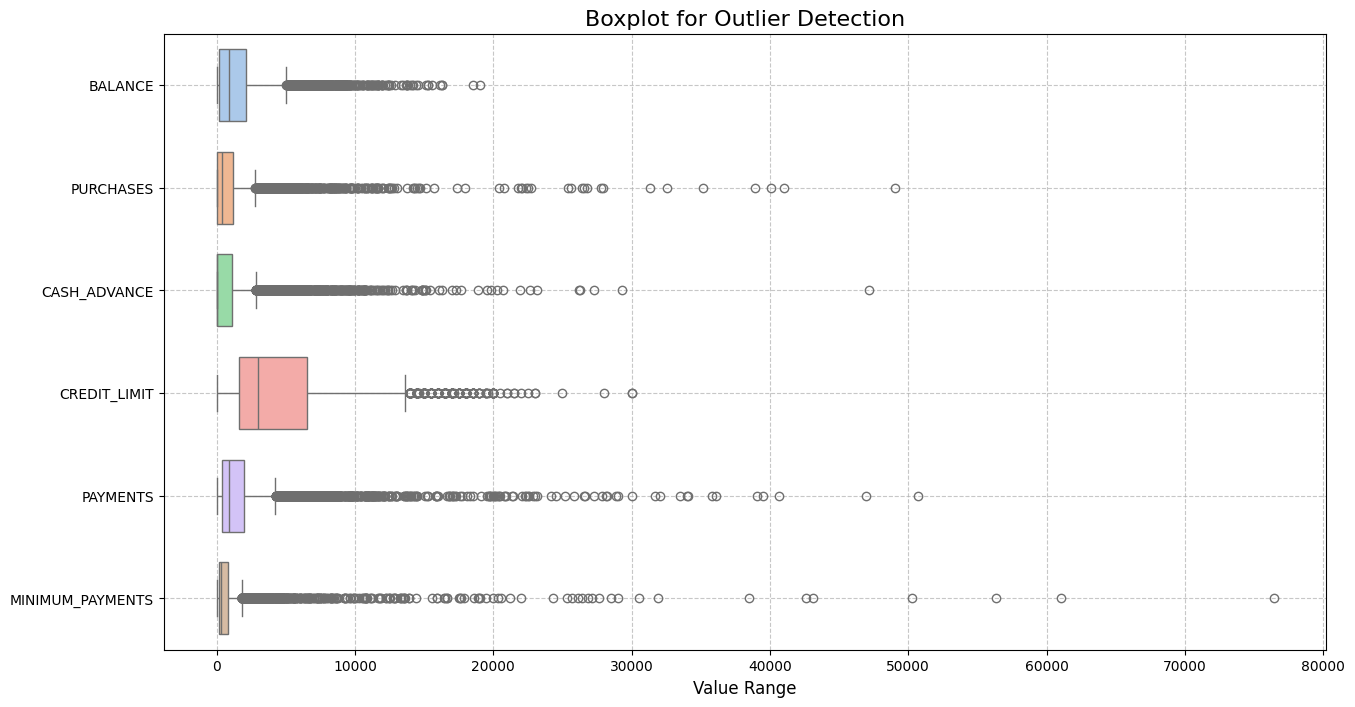

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_cols], orient='h', palette='pastel', width=0.7)
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xlabel("Value Range", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [14]:
from IPython.display import display
from scipy.stats import zscore

z_scores = data[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum().sort_values(ascending=False)

outliers_summary = pd.DataFrame({
    "Feature": outliers.index,
    "Number of Outliers": outliers.values
})

display(outliers_summary)
print("Outlier Summary Table displayed.")

,Feature,Number of Outliers
0,BALANCE,186
1,CASH_ADVANCE,177
2,PAYMENTS,154
3,CREDIT_LIMIT,149
4,PURCHASES,129
5,MINIMUM_PAYMENTS,100


Outlier Summary Table displayed.


**Key Observations:**

* `BALANCE` and `CASH_ADVANCE` have the most outliers, suggesting a subset of **high-value** customers.

* Features like `MINIMUM_PAYMENTS` still show significant deviations, indicating irregular payment patterns.

d:\Data_Projects\Credit-Card-Clustering-with-Machine-Learning\Credit_Cart\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
d:\Data_Projects\Credit-Card-Clustering-with-Machine-Learning\Credit_Cart\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
d:\Data_Projects\Credit-Card-Clustering-with-Machine-Learning\Credit_Cart\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
d:\Data_Projects\Credit-Card-Clustering-with-Machine-Learning\Credit_Cart\lib\site

<Figure size 2000x1000 with 0 Axes>

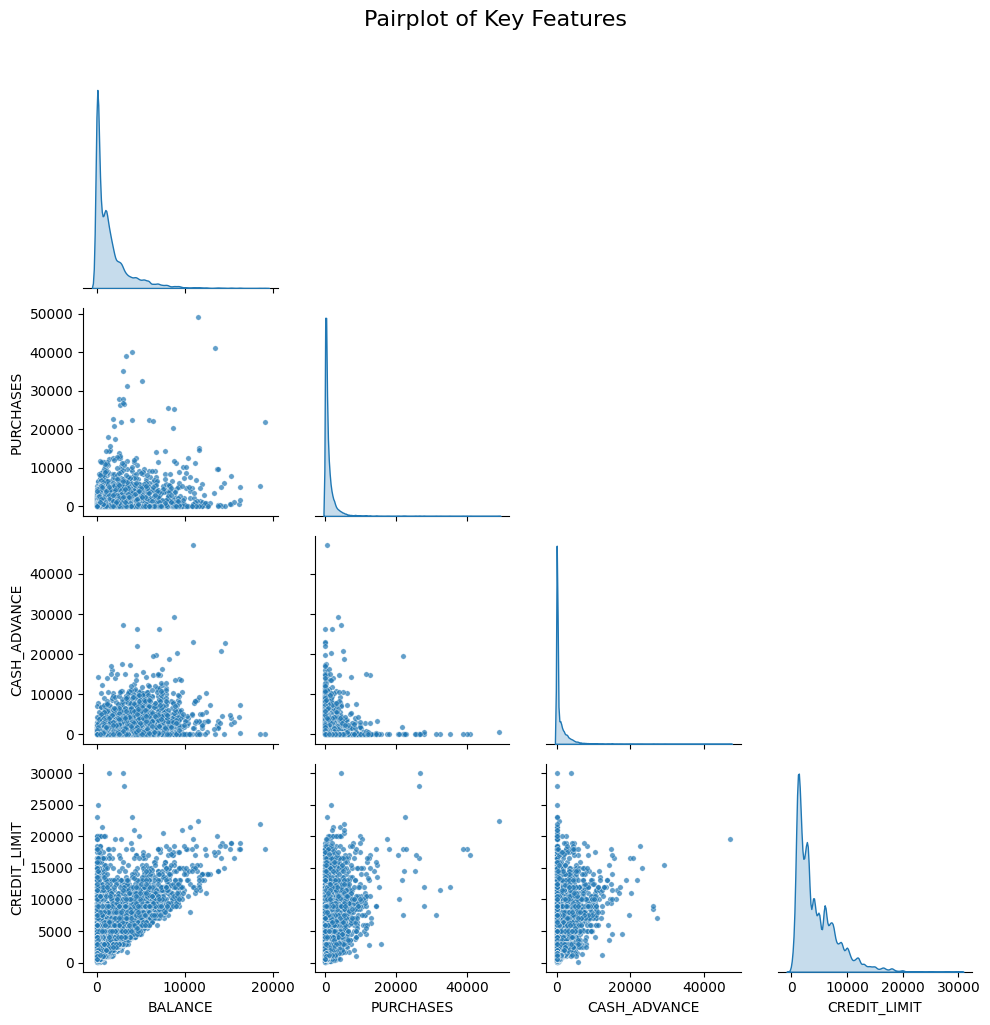

In [15]:
plt.figure(figsize=(20, 10))
sns.pairplot(
    data, 
    vars=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT'], 
    diag_kind='kde', 
    corner=True, 
    plot_kws={'alpha': 0.7, 's': 15}, 
    diag_kws={'shade': True, 'bw_adjust': 0.5}
)
plt.suptitle("Pairplot of Key Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Description:**

Pairplot visualizes relationships between key features (`BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`).

**Key Observations:**

* A clear positive trend between `BALANCE` and `CREDIT_LIMIT`.

* Dispersed relationships between PURCHASES and other features, suggesting customer spending behavior is diverse.

**Actionable Insight:**

These visualizations highlight customer clusters that could benefit from targeted segmentation and marketing.

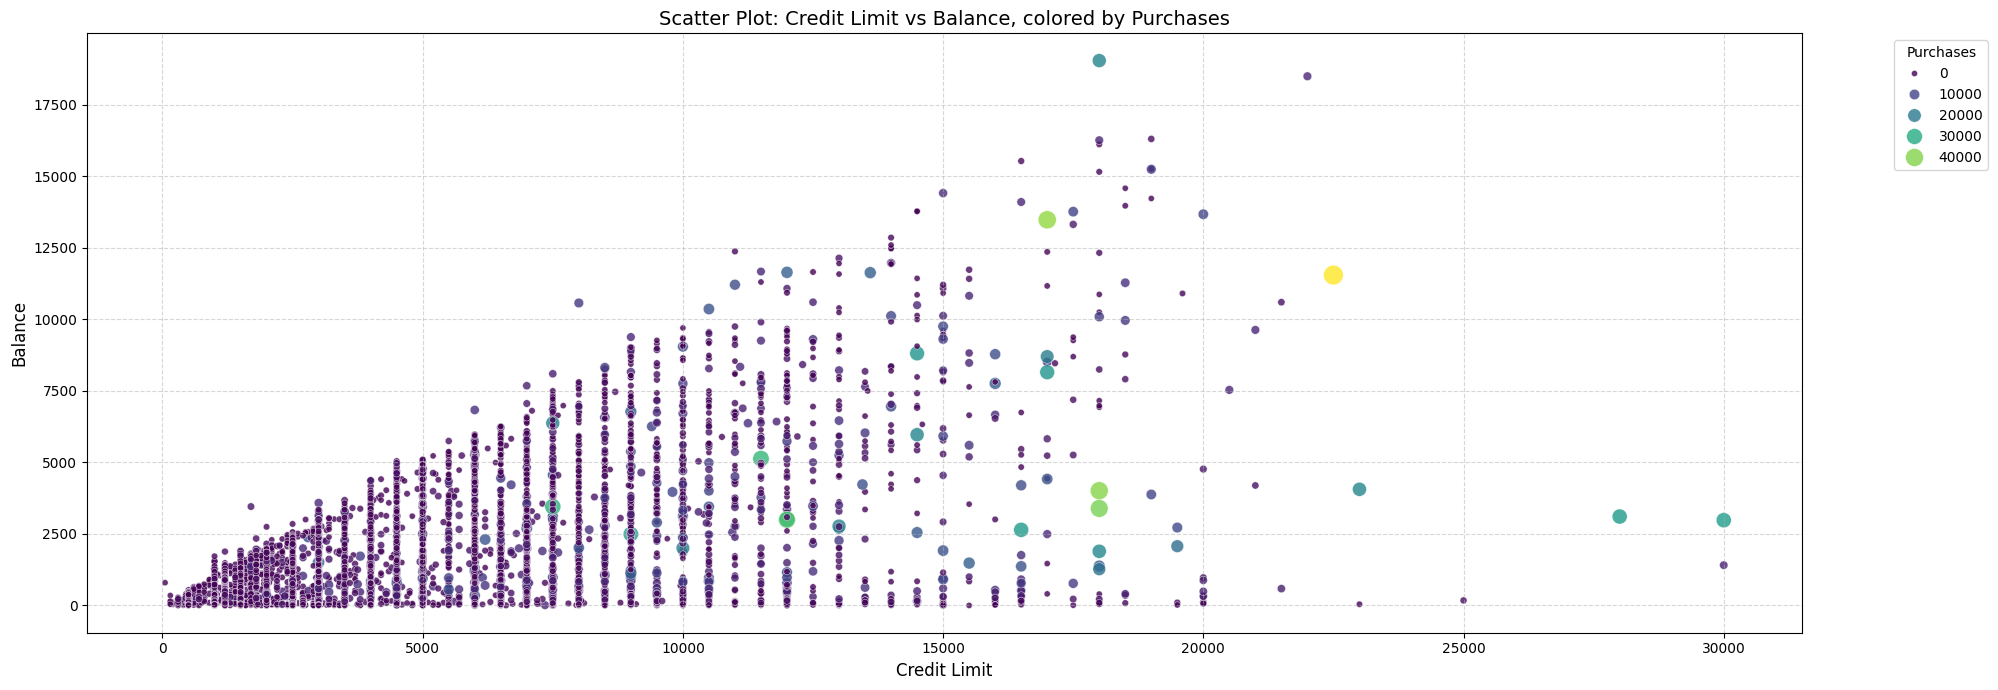

In [16]:
plt.figure(figsize=(20, 7))
sns.scatterplot(
    x=data['CREDIT_LIMIT'], 
    y=data['BALANCE'], 
    hue=data['PURCHASES'], 
    palette='viridis', 
    size=data['PURCHASES'], 
    sizes=(20, 200), 
    alpha=0.8, 
    edgecolor="w"
)
plt.title("Scatter Plot: Credit Limit vs Balance, colored by Purchases", fontsize=14)
plt.xlabel("Credit Limit", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Purchases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Description:**

A scatter plot shows the relationship between `CREDIT_LIMIT` and `BALANCE`, colored by **PURCHASES**.

**Key Observations:**

* **Linear Trend:** As `CREDIT_LIMIT` increases, `BALANCE` also tends to rise.

* **High Purchases:** Customers with higher credit limits often have higher balances and purchases.

**Actionable Insight:**

Focus on high-value customers for credit upgrades or reward-based loyalty programs.

# Clustering

In [23]:
clustering_data = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

# Step 1: Normalize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

In [24]:
# Step 2: Apply KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data_normalized)

In [25]:
# Step 3: Add Clusters to the Original Data
data["CREDIT_CARD_SEGMENTS"] = clusters

# Map cluster numbers to human-readable labels
cluster_labels = {
    0: "Cluster 1",
    1: "Cluster 2",
    2: "Cluster 3",
    3: "Cluster 4",
    4: "Cluster 5"
}

data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map(cluster_labels)

print(data[["CREDIT_CARD_SEGMENTS"]].head(10))

   CREDIT_CARD_SEGMENTS
0             Cluster 2
1             Cluster 4
2             Cluster 4
4             Cluster 2
5             Cluster 2
6             Cluster 5
7             Cluster 2
8             Cluster 1
9             Cluster 5
10            Cluster 2


### 3D scatter plot to visualize clusters

In [26]:
fig = go.Figure()

for cluster in data["CREDIT_CARD_SEGMENTS"].unique():
    cluster_data = data[data["CREDIT_CARD_SEGMENTS"] == cluster]
    fig.add_trace(
        go.Scatter3d(
            x=cluster_data['BALANCE'],
            y=cluster_data['PURCHASES'],
            z=cluster_data['CREDIT_LIMIT'],
            mode='markers',
            marker=dict(size=5, line=dict(width=1), opacity=0.8),
            name=cluster 
        )
    )

fig.update_layout(
    title="3D Visualization of Customer Clusters",
    scene=dict(
        xaxis_title='BALANCE',
        yaxis_title='PURCHASES',
        zaxis_title='CREDIT_LIMIT'
    ),
    legend_title="Credit Card Segments",
    template="plotly_white"
)

fig.show()

### 2D Visualization of Clusters: `BALANCE` vs. `PURCHASES`

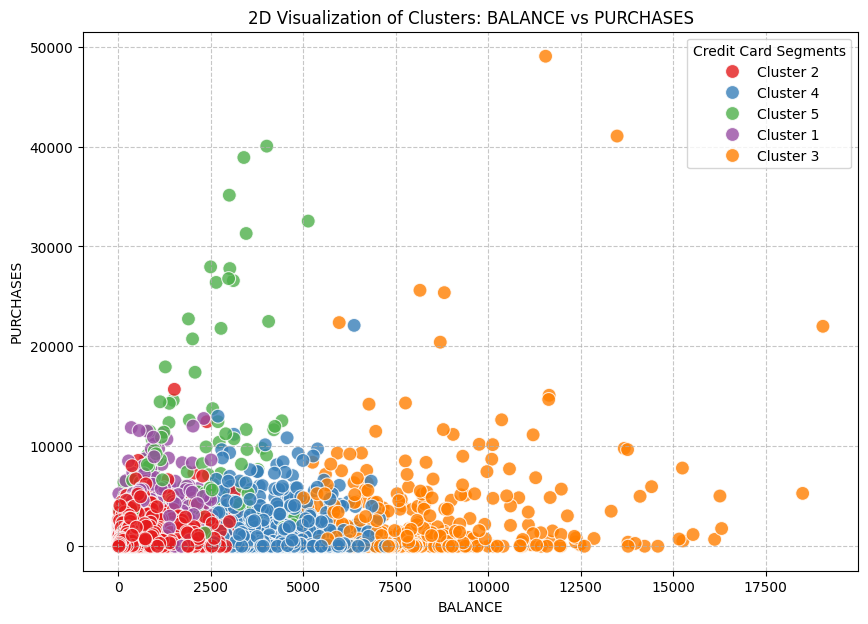

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['BALANCE'], 
    y=data['PURCHASES'], 
    hue=data['CREDIT_CARD_SEGMENTS'], 
    palette='Set1', 
    s=100, 
    alpha=0.8
)
plt.title("2D Visualization of Clusters: BALANCE vs PURCHASES")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend(title="Credit Card Segments")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This scatter plot shows the relationship between `BALANCE` and `PURCHASES`, with points color-coded by their clusters. It visually segments the customers into distinct groups.

***Observations:***

1. **Cluster 2 (Red):**

These points are concentrated in the lower-left quadrant, indicating low balances and purchases.
Insight: These customers are low spenders and require less attention unless retention is a priority.

2. **Cluster 5 (Green):**

Located in the middle of the plot with medium balances and high purchases.
Insight: Represents engaged customers with controlled balances and significant purchase activity. Target for loyalty programs or rewards.

3. **Cluster 3 (Orange):**

Spread towards the upper-right quadrant with high balances and purchases.
Insight: Premium customers who may require exclusive offers, increased credit limits, or targeted campaigns to maintain loyalty.

4. **Cluster 4 (Blue):**

Scattered in the middle-left with medium balances and low purchases.
Insight: These customers might be occasional users or use credit cards for specific purposes.

5. **Cluster 1 (Purple):**

Concentrated near the lower-middle region with low balances and moderate purchases.
Insight: Represents moderate users who might respond well to promotional offers to boost their spending.

### Calculate average feature values for each cluster

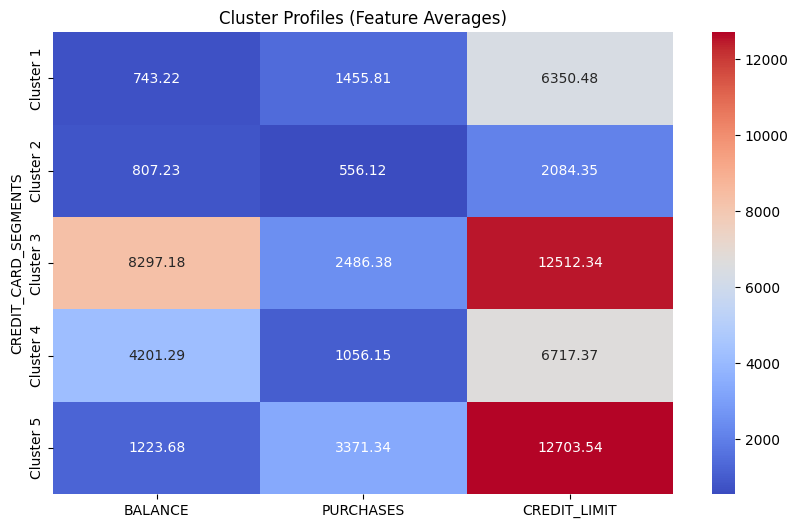

In [28]:
cluster_profiles = data.groupby("CREDIT_CARD_SEGMENTS")[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cluster Profiles (Feature Averages)")
plt.show()

***Heatmap of Cluster Profiles (Feature Averages)***

The heatmap represents the average values of `BALANCE`, `PURCHASES`, and `CREDIT_LIMIT` for each cluster. It provides a high-level summary of the behavior and characteristics of each cluster.

***Cluster Profiles:***

1. **Cluster 1 (Low Balance, Medium Purchases, Medium Credit Limit):**

Customers in this cluster maintain low balances and moderately use their credit cards for purchases. They might be disciplined spenders with sufficient credit limits.

2. **Cluster 2 (Low Balance, Low Purchases, Low Credit Limit):**

Insight: These are likely low-value customers who use their credit cards sparingly. They may not need higher limits or may prefer other payment methods.

3. **Cluster 3 (High Balance, High Purchases, High Credit Limit):**

Insight: These are premium customers with high spending and credit limits. They represent high-value users for the business.

4. **Cluster 4 (Medium Balance, Low Purchases, Medium Credit Limit):**

Insight: Customers in this group maintain a medium balance but have relatively low purchase activity. They might rely on their credit cards for specific needs or emergencies.

5. **Cluster 5 (Medium Balance, High Purchases, High Credit Limit):**

Insight: These customers heavily use their credit cards for purchases while keeping their balances manageable. They might represent engaged users with high spending.


# Conclusion
The clustering analysis successfully segmented customers into 5 distinct groups based on their financial behavior. The insights derived can guide targeted marketing strategies, improve customer satisfaction, and enhance profitability.

## Actionable Insights

1. **Cluster 1 (Moderate Users):**

* Customers maintain low balances and medium purchases.
* **Action**: Offer targeted promotions to increase their spending.

2. **Cluster 2 (Low Value):**

* Low balances and purchases, with limited credit limits.
* **Action**: Reactivate these customers with cashback offers or incentives for higher usage.

3. **Cluster 3 (Premium Customers):**

* High balances, purchases, and credit limits.
* **Action**: Retain these customers with loyalty programs or exclusive offers.

4. **Cluster 4 (Occasional Users):**

* Moderate balances and purchases but relatively inactive.
* **Action**: Encourage usage by educating them about benefits or offering spending-based rewards.

5. **Cluster 5 (Engaged Users):**

* Medium balances and high purchases with significant credit limits.
* **Action**: Focus on rewards or credit upgrades to further engage them.
